In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'legend.frameon':True})

columns = [
    'id', 'testing_for', 'address', 'zip_code', 'provider',
    'connected_with', 'monthly_price', 'provider_down_speed',
    'provider_price', 'actual_down_speed', 'actual_price', 'rating',
    'completed', 'created_at', 'updated_at', 'latitude', 'longitude',
    'ping', 'actual_upload_speed', 'test_id', 'ip_address', 'hostname',
    'from_mlab', 'area_code', 'test_type', 'census_code',
    'upload_median', 'download_median', 'census_status', 'test_date',
    'country_code', 'region', 'county', 'accuracy', 'location',
    'census_block'
]

# Load and filter CSV in chunks (less memory, require 5GB to load full dataset) to just from_mlab = 0 (SUA submissions)
iter_csv = pd.read_csv('./data/9035f7b8-2d2f-4de0-a816-4067e1ae8fd8.csv', header=None, names=columns, iterator=True, chunksize=1000)
sua = pd.concat([chunk[chunk['from_mlab'] == 0] for chunk in iter_csv])

In [2]:
sua['rating'] = sua['rating'].replace(0.0,  np.nan)
sua = sua[sua['test_type'] != 'duplicate']

In [3]:
sua.shape

(915, 36)

In [4]:
sua.describe()

,zip_code,monthly_price,provider_down_speed,provider_price,actual_down_speed,actual_price,rating,completed,latitude,longitude,...,actual_upload_speed,from_mlab,area_code,census_code,upload_median,download_median,county,accuracy,location,census_block
count,861.000000,506.000000,432.000000,410.000000,915.000000,410.000000,564.000000,915.000000,864.000000,864.000000,...,915.000000,915.0,0.0,8.450000e+02,0.0,0.0,863.000000,2.310000e+02,0.0,7.740000e+02
mean,95064.322880,75.796443,111.099537,6.065244,51.373071,29.636878,4.085106,0.985792,43.732935,-121.397488,...,22.675169,0.0,NaN,4.049242e+10,NaN,NaN,40014.774044,1.639662e+04,NaN,4.108180e+14
std,11137.806428,38.968991,192.679498,13.242669,75.565847,117.093168,1.921143,0.118411,2.183316,8.059105,...,70.438770,0.0,NaN,4.497840e+09,NaN,NaN,5653.205158,1.273248e+05,NaN,1.708982e+13
min,6473.000000,0.000000,0.000000,0.010000,0.090000,0.040000,1.000000,0.000000,20.907700,-157.992500,...,0.000000,0.0,NaN,6.037462e+09,NaN,NaN,4019.000000,6.000000e+00,NaN,1.601195e+14
25%,97401.000000,50.000000,12.000000,0.600000,7.245000,1.172500,3.000000,1.000000,44.013775,-123.165825,...,1.445000,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,5.000000e+01,NaN,4.103900e+14
50%,97405.000000,66.500000,50.000000,1.600000,25.640000,3.230000,4.000000,1.000000,44.050000,-123.092500,...,5.710000,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,5.300000e+01,NaN,4.103900e+14
75%,97448.000000,90.000000,100.000000,5.000000,68.105000,11.760000,6.000000,1.000000,44.089100,-123.021375,...,11.475000,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,1.062000e+03,NaN,4.103900e+14
max,99352.000000,200.000000,1500.000000,120.000000,828.200000,1428.570000,7.000000,1.000000,47.548000,-72.839700,...,864.820000,0.0,NaN,5.502500e+10,NaN,NaN,55025.000000,1.488703e+06,NaN,5.306301e+14


In [5]:
#print(
sua.groupby('provider').agg({
    "id": ["count"],
    "rating":  ["mean", "median", "count"],
    "actual_down_speed": ["mean", "median", "count"],
    "monthly_price": ["mean", "median", "count"],
    "actual_price": ["mean", "median", "count"]
}).sort_values(('id', 'count'), ascending=False).head(15)
#.to_string())

id    rating         \
                                                   count      mean median   
provider                                                                    
Comcast Cable Communications, LLC                    331  4.485294    5.0   
CenturyLink Communications, LLC                      176  2.724138    2.5   
Charter Communications                                71  4.357143    4.0   
XS Media                                              66  5.568627    6.0   
Verizon Wireless                                      35  2.833333    2.5   
ViaSat,Inc.                                           24  1.900000    1.0   
Douglas FastNet                                       18  7.000000    7.0   
Hughes Network Systems                                18  2.181818    2.0   
AT&T Mobility LLC                                     15  4.000000    4.0   
Frontier Communications of America, Inc.              14  2.500000    2.5   
Emerald Broadband, LLC                                13  4.083333    4.5   
Network for Education and Research in Oregon (N...    11  6.000000    6.0   
EASTERN OREGON TELECOM                                 8  4.250000    4.0   
Peak Internet, LLC                                     7  4.000000    3.0   
Charter Communications Inc                             6  4.250000    4.0   

                                                         actual_down_speed  \
                                                   count              mean   
provider                                                                     
Comcast Cable Communications, LLC                    204         71.387462   
CenturyLink Communications, LLC                      116          9.556136   
Charter Communications                                42         41.821690   
XS Media                                              51         96.455152   
Verizon Wireless                                      18         16.840571   
ViaSat,Inc.                                           20          8.120000   
Douglas FastNet                                       16        118.807222   
Hughes Network Systems                                11          5.062778   
AT&T Mobility LLC                                      6         17.084667   
Frontier Communications of America, Inc.              10         11.149286   
Emerald Broadband, LLC                                12         22.846923   
Network for Education and Research in Oregon (N...     2         69.136364   
EASTERN OREGON TELECOM                                 4         10.001250   
Peak Internet, LLC                                     3         75.141429   
Charter Communications Inc                             4         58.076667   

                                                                  \
                                                    median count   
provider                                                           
Comcast Cable Communications, LLC                   58.870   331   
CenturyLink Communications, LLC                      4.980   176   
Charter Communications                              30.140    71   
XS Media                                            48.655    66   
Verizon Wireless                                     7.170    35   
ViaSat,Inc.                                          5.780    24   
Douglas FastNet                                     77.285    18   
Hughes Network Systems                               2.315    18   
AT&T Mobility LLC                                    9.640    15   
Frontier Communications of America, Inc.             7.510    14   
Emerald Broadband, LLC                              10.400    13   
Network for Education and Research in Oregon (N...  28.370    11   
EASTERN OREGON TELECOM                               8.490     8   
Peak Internet, LLC                                  21.500     7   
Charter Communications Inc                          59.155     6   

                                     

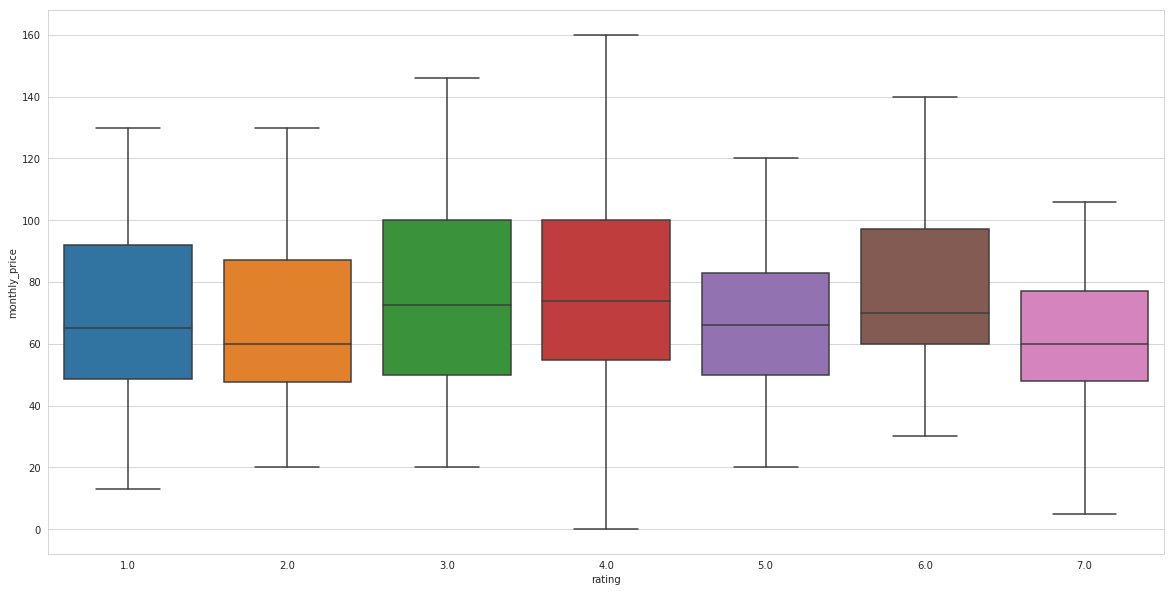

In [6]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='rating', y='monthly_price', data=sua, showfliers=False)

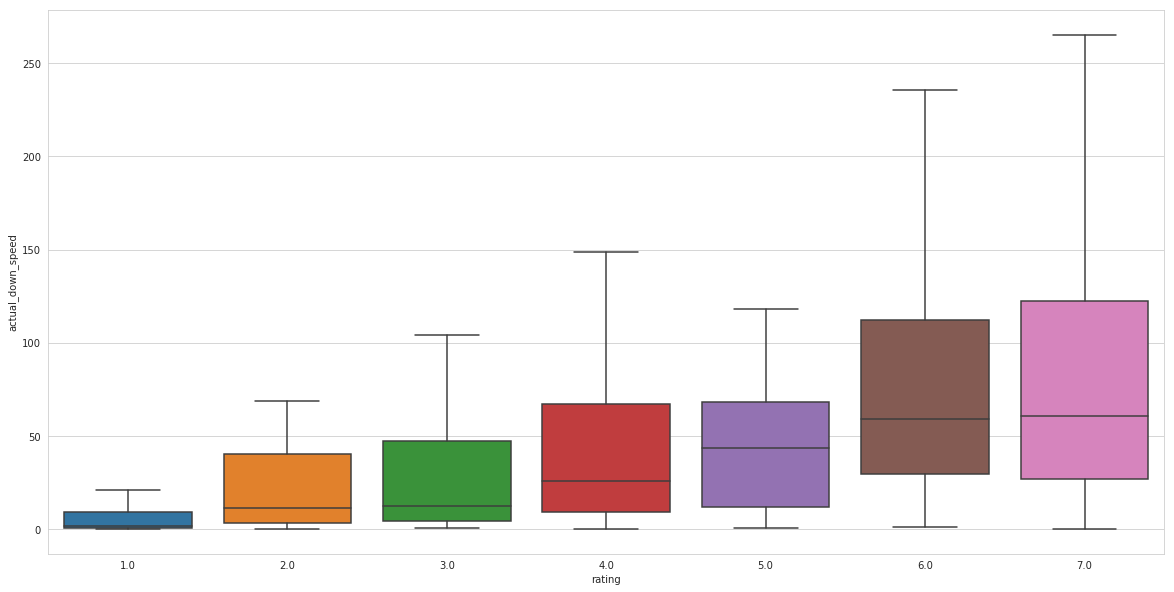

In [7]:
plt.figure(figsize=(20, 10))
#ax = sns.swarmplot(x='rating', y='actual_down_speed', data=sua, color=".25")
ax = sns.boxplot(x='rating', y='actual_down_speed', data=sua,  showfliers=False)

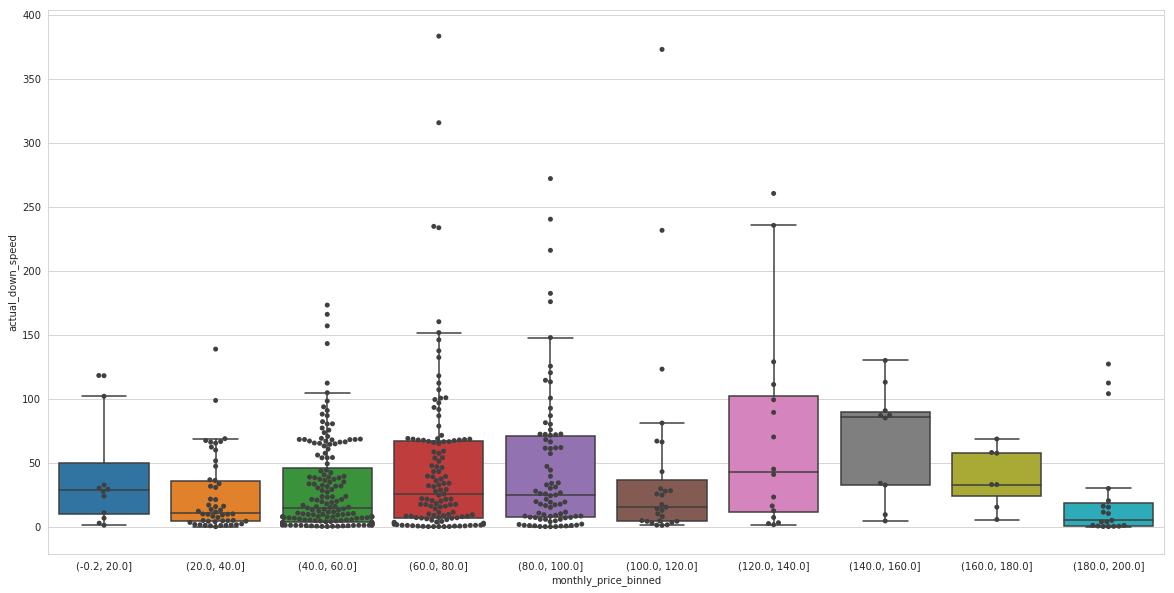

In [8]:
sua['monthly_price_binned'] = pd.cut(sua['monthly_price'], 10)
plt.figure(figsize=(20, 10))
ax = sns.swarmplot(x='monthly_price_binned', y='actual_down_speed', data=sua, color=".25")
ax = sns.boxplot(x='monthly_price_binned', y='actual_down_speed', data=sua, showfliers=False)

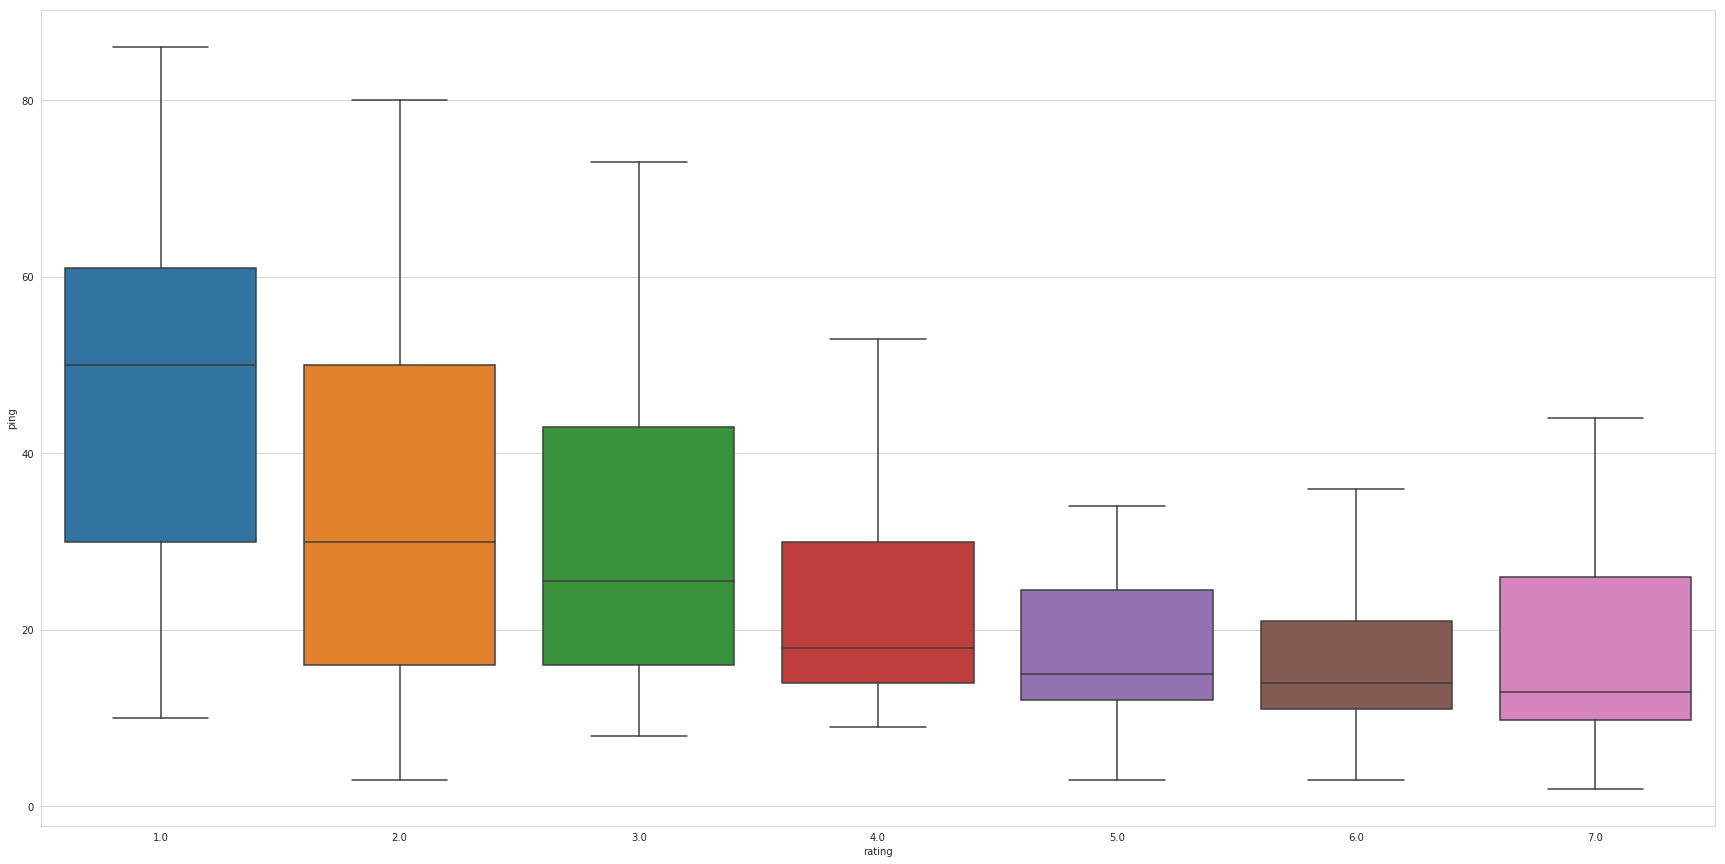

In [163]:
plt.figure(figsize=(30, 15))
ax = sns.boxplot(x='rating', y='ping', data=sua, showfliers=False)

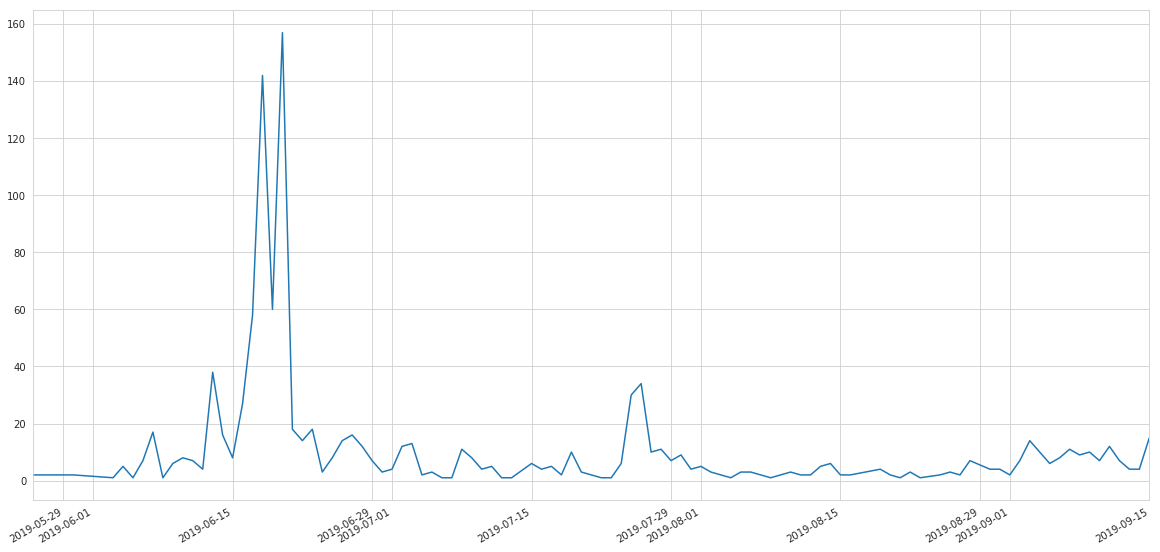

In [164]:
sua['test_datetime'] = pd.to_datetime(sua['test_date'])
by_date = sua['test_datetime'].value_counts()
by_date.plot(figsize=(20,10))